In [1]:
import tensorflow as tf
from tensorflow import keras
import visualkeras
from keras import datasets
from keras.models import Sequential
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont
from collections import defaultdict
from models import *

## Exploring the dataset

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [8]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [9]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

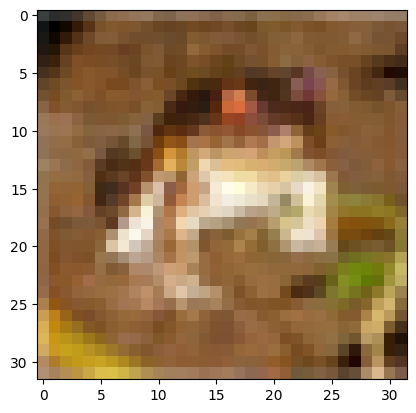

In [10]:
#First training image
plt.imshow(x_train[0])
plt.show()

In [11]:
#Label of the first train image (frog)
y_train[0]

array([6], dtype=uint8)

In [12]:
#Make the validation data
x_val, y_val = x_test[: 5000], y_test[: 5000]
x_test, y_test = x_test[5000 :], y_test[5000 :]

In [13]:
x_val.shape, y_val.shape

((5000, 32, 32, 3), (5000, 1))

In [14]:
x_test.shape, y_test.shape

((5000, 32, 32, 3), (5000, 1))

## Grayscale function

In [15]:
def to_grayscale(imgs): #Grayscale images with 3 bands
    gray_imgs = []
    for im in imgs:
        if imgs.ndim == 3:
            im = imgs
        img = Image.fromarray(im.astype('uint8'))
        img = img.convert(mode='L')
        img_arr = np.asarray(img)
        img_arr = img_arr.reshape(img_arr.shape[0], img_arr.shape[1], 1)
        orig_arr = img_arr.copy()
        for i in range(2):
            img_arr = np.append(img_arr, orig_arr, axis=2)
        if imgs.ndim == 3:
            return img_arr
        gray_imgs.append(img_arr)
    return np.array(gray_imgs)

In [17]:
# Construct the grayscale images dataset
grayx_train = to_grayscale(x_train)
grayx_val = to_grayscale(x_val)
grayx_test = to_grayscale(x_test)

## Constructing the model

In [26]:
# Create the model
# Select a function to construct the model from the models.py file
model = Sequential()
model = model1(model)

In [27]:
# Model's layers
model.layers

In [28]:
model.predict(x_train[:1].astype('float32')) # Forward pass

# Visualize the model with visualkeras
font = ImageFont.truetype("arial.ttf", 15)
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'orange'
color_map[layers.UpSampling2D]['fill'] = 'gray'
color_map[layers.MaxPooling2D]['fill'] = 'red'

visualkeras.layered_view(model, legend=True, color_map=color_map, font=font, 
                       scale_xy=10, scale_z=2, min_z=0.1).show()

1/1 [==============================] - 0s 341ms/step


In [29]:
model.summary() # Summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 16)          1744      
                                                                 
 up_sampling2d_6 (UpSampling  (None, 16, 16, 16)      

## Compiling and training the model

In [21]:
#Image pixels normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255
grayx_train = grayx_train.astype('float32') / 255
grayx_test = grayx_test.astype('float32') / 255

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))
x_val = np.reshape(x_val, (len(x_val), 32, 32, 3))
grayx_train = np.reshape(grayx_train, (len(grayx_train), 32, 32, 3))
grayx_test = np.reshape(grayx_test, (len(grayx_test), 32, 32, 3))

In [22]:
# Train
# (x_train, x_train) and validation_data=(x_val, x_val) for autoencoder
# (grayx_train, x_train) and validation_data=(grayx_val, x_val) for autoencoder

model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True, validation_data=(x_val, x_val))

Epoch 1/10
 45/391 [==>...........................] - ETA: 1:51 - loss: 0.9751

KeyboardInterrupt: 

## Plot the model's accuracy and loss

In [23]:
# Plot the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xticks(np.arange(21, step=5))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('acc') #Save the figure
plt.show()

NameError: name 'history' is not defined

In [24]:
# Plot the loss
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.xticks(np.arange(21, step=5))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('loss') #Save the figure
plt.show()

NameError: name 'history' is not defined

## Saving the model weights

In [30]:
#model.save_weights('mymodel_weights.ht5')